<a href="https://colab.research.google.com/github/thuc-github/MIS710-T12023/blob/main/A1/MIS710%20A1%20Template%20T1%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title: Improving Game Ratings for Enhanced User Satisfaction and Game Acquisition of Play Quest Conquer (PQC)**  
---

**Business Overview:** Play Quest Conquer (PQC), headquartered in Sydney, is an online gaming platform that provides a wide selection of premium digital games to users worldwide. Operating on a freemium model, PQC drives revenue through in-game purchases, subscriptions, and advertising. The platform focuses on fostering user engagement and community involvement, establishing itself as a key competitor in the gaming industry while continually innovating to grow and maintain its audience. <br>

**Business Problem:** PQC seeks to identify key factors influencing game ratings to enhance user satisfaction, boost game acquisition, and increase overall business profitability. <br>

**Aim of the Project:** To develop a machine learning model to predict game ratings and provide actionable insights for improving game development, acquisition, and promotion strategies. <br>

**Recommendations for PQC:**


<a id = "cell_exploration"></a>
## 1. Loading data


In [7]:
!pip install wget
import wget

data_url = 'https://raw.githubusercontent.com/Sr-jana/Game-Rating/refs/heads/main/PQC_data.csv'
DataSet = wget.download(data_url)

<a id = "cell_exploration"></a>
## 2. Data understanding, preparation, explorations and visualisation


### 2.1 Data Understanding


In [9]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Importing data from GitHub
info = pd.read_csv(data_url)

# Inspect the dataset
print(info.head())

   Game_ID                Game_Name  Released_Year Game_Type    Age_Category  \
0     9048          Age of Industry           2010  BaseGame  12 to under 18   
1    40086       Going The Distance           1998  BaseGame         under 5   
2    12545                   Inside           2007  BaseGame   5 to under 12   
3    62639              New Bedford           2016  BaseGame  12 to under 18   
4    26419  Sekigahara fierce fight           1988  BaseGame  12 to under 18   

   Min_Players  Max_Players  Average_Complexity  Complexity_Raters  \
0            2            5              3.3636                231   
1            2            8              2.0000                  3   
2            2            2              2.0000                 12   
3            1            4              2.4000                  5   
4            1            2              3.0000                  2   

   Average_Play_Time  Owner_Number  Trader_Number  HighInterest_Number  \
0                120    

In [ ]:
#floating numbers have different floating values, setting up formating for floating values
#set the formatting for floating numbers
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Inspection after formatting the dataset
print(info.head())


   Game_ID                Game_Name  Released_Year Game_Type    Age_Category  \
0     9048          Age of Industry           2010  BaseGame  12 to under 18   
1    40086       Going The Distance           1998  BaseGame         under 5   
2    12545                   Inside           2007  BaseGame   5 to under 12   
3    62639              New Bedford           2016  BaseGame  12 to under 18   
4    26419  Sekigahara fierce fight           1988  BaseGame  12 to under 18   

   Min_Players  Max_Players  Average_Complexity  Complexity_Raters  \
0            2            5                3.36                231   
1            2            8                2.00                  3   
2            2            2                2.00                 12   
3            1            4                2.40                  5   
4            1            2                3.00                  2   

   Average_Play_Time  Owner_Number  Trader_Number  HighInterest_Number  \
0                120    

In [ ]:
#checking number of observations(rows) and attributes (columns) in the dataset
print("\n*** Dataset shape: (Rows * Columns)", info.shape)


*** Dataset shape: (Rows * Columns) (24813, 17)


In [ ]:
#checking datatypes
print(info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24813 entries, 0 to 24812
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Game_ID              24813 non-null  int64  
 1   Game_Name            24806 non-null  object 
 2   Released_Year        24813 non-null  int64  
 3   Game_Type            24813 non-null  object 
 4   Age_Category         24813 non-null  object 
 5   Min_Players          24813 non-null  int64  
 6   Max_Players          24813 non-null  int64  
 7   Average_Complexity   24813 non-null  float64
 8   Complexity_Raters    24813 non-null  int64  
 9   Average_Play_Time    24813 non-null  int64  
 10  Owner_Number         24813 non-null  int64  
 11  Trader_Number        24813 non-null  int64  
 12  HighInterest_Number  24813 non-null  int64  
 13  Interest_Number      24813 non-null  int64  
 14  Rater_Number         24813 non-null  int64  
 15  Comment_Number       24813 non-null 

In [ ]:
#checking for missing data
for i in info.iloc[:,0:]:
  miss=info[i].isna().sum()
  print('Missing in', i , miss)


Missing in Game_ID 0
Missing in Game_Name 7
Missing in Released_Year 0
Missing in Game_Type 0
Missing in Age_Category 0
Missing in Min_Players 0
Missing in Max_Players 0
Missing in Average_Complexity 0
Missing in Complexity_Raters 0
Missing in Average_Play_Time 0
Missing in Owner_Number 0
Missing in Trader_Number 0
Missing in HighInterest_Number 0
Missing in Interest_Number 0
Missing in Rater_Number 0
Missing in Comment_Number 0
Missing in Average_Rating 0
Missing in Year_Interval 0


Although Game_Name has 7 missing values, we can ignore them since name of game do not have much impact on game rating.

In [ ]:
#descriptive summary of dataset
info.describe()

,Game_ID,Released_Year,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number,Average_Rating
count,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00,24813.00
mean,30936.02,1997.20,2.06,5.32,1.99,42.55,55.21,674.20,23.19,32.46,111.18,426.81,125.99,6.21
std,18959.06,126.09,0.67,7.08,0.83,190.11,42.59,2453.51,61.47,95.83,378.75,1881.19,457.63,1.51
min,7074.00,-99.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,14652.00,2000.00,2.00,4.00,1.23,1.00,25.00,17.00,0.00,0.00,2.00,7.00,4.00,5.56
50%,24721.00,2007.00,2.00,4.00,2.00,4.00,45.00,77.00,3.00,3.00,9.00,27.00,13.00,6.43
75%,47162.00,2012.00,2.00,6.00,2.50,16.00,60.00,376.00,17.00,18.00,49.00,142.00,57.00,7.15
max,71822.00,2017.00,9.00,99.00,5.00,5996.00,180.00,73188.00,1395.00,1586.00,6402.00,53680.00,11798.00,10.00


In [ ]:
# Lets categorize the years into different intervals to see changing pattern of average rating over time


# Counting unique released years
unique_years = info['Released_Year'].unique()

# Print the count of unique years
print("Unique Years count: ", len(unique_years))

# Print unique years after sorting
unique_years.sort()
print("Unique Years: ", unique_years)

# Print the range of years
print("Range of Years: ", (unique_years.min(), unique_years.max()))


Unique Years count:  39
Unique Years:  [ -99 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017]
Range of Years:  (-99, 2017)


In [ ]:
# Define the bins for every 2 years
bins = list(range(1979, 2021, 2))  #range with inclusive upper bound

# Define labels for the intervals
labels = [f'{year}-{year+1}' for year in range(1979, 2018, 2)]

# We are excluding year -99 from the dataset
info = info[info['Released_Year'] >= 1980]

# Converting the Released_Year into intervals
info['Year_Interval'] = pd.cut(info['Released_Year'], bins=bins, labels=labels, right=False, include_lowest=True)

# Display 20 random rows to validate correct categorization of released years
print(info[['Released_Year', 'Year_Interval']].sample(n=20, random_state=1))


       Released_Year Year_Interval
558             2008     2007-2008
20043           1994     1993-1994
12932           1984     1983-1984
11776           2003     2003-2004
604             2005     2005-2006
22864           2013     2013-2014
2455            2006     2005-2006
11969           2012     2011-2012
22584           2005     2005-2006
17873           1988     1987-1988
18595           2009     2009-2010
2359            2010     2009-2010
22437           2003     2003-2004
18925           2010     2009-2010
2785            2011     2011-2012
15636           2007     2007-2008
11611           1999     1999-2000
998             1990     1989-1990
18032           1996     1995-1996
15766           2007     2007-2008


<ipython-input-11-6a6fc21ef8dc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info['Year_Interval'] = pd.cut(info['Released_Year'], bins=bins, labels=labels, right=False, include_lowest=True)


In [ ]:
#Updated adding Year_Interval as new column in the existing dataset
info.head()

,Game_ID,Game_Name,Released_Year,Game_Type,Age_Category,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number,Average_Rating,Year_Interval
0,9048,Age of Industry,2010,BaseGame,12 to under 18,2,5,3.36,231,120,2697,71,293,796,2323,751,7.52,2009-2010
1,40086,Going The Distance,1998,BaseGame,under 5,2,8,2.00,3,60,3,0,1,4,4,2,7.50,1997-1998
2,12545,Inside,2007,BaseGame,5 to under 12,2,2,2.00,12,10,187,8,20,49,137,46,6.49,2007-2008
3,62639,New Bedford,2016,BaseGame,12 to under 18,1,4,2.40,5,75,62,1,36,184,28,56,7.66,2015-2016
4,26419,Sekigahara fierce fight,1988,BaseGame,12 to under 18,1,2,3.00,2,120,4,0,1,3,3,1,7.50,1987-1988


In [ ]:
# Calculate the average rating for each Year_Interval category
average_rating_per_interval = info.groupby('Year_Interval')['Average_Rating'].mean().reset_index()

# Print the results
print(average_rating_per_interval)

   Year_Interval  Average_Rating
0      1979-1980            5.62
1      1981-1982            5.63
2      1983-1984            5.63
3      1985-1986            5.58
4      1987-1988            5.59
5      1989-1990            5.60
6      1991-1992            5.77
7      1993-1994            5.64
8      1995-1996            5.71
9      1997-1998            5.83
10     1999-2000            5.77
11     2001-2002            5.74
12     2003-2004            5.83
13     2005-2006            5.98
14     2007-2008            6.19
15     2009-2010            6.35
16     2011-2012            6.64
17     2013-2014            6.83
18     2015-2016            7.19
19     2017-2018            3.34


<ipython-input-13-938aa5176575>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_per_interval = info.groupby('Year_Interval')['Average_Rating'].mean().reset_index()


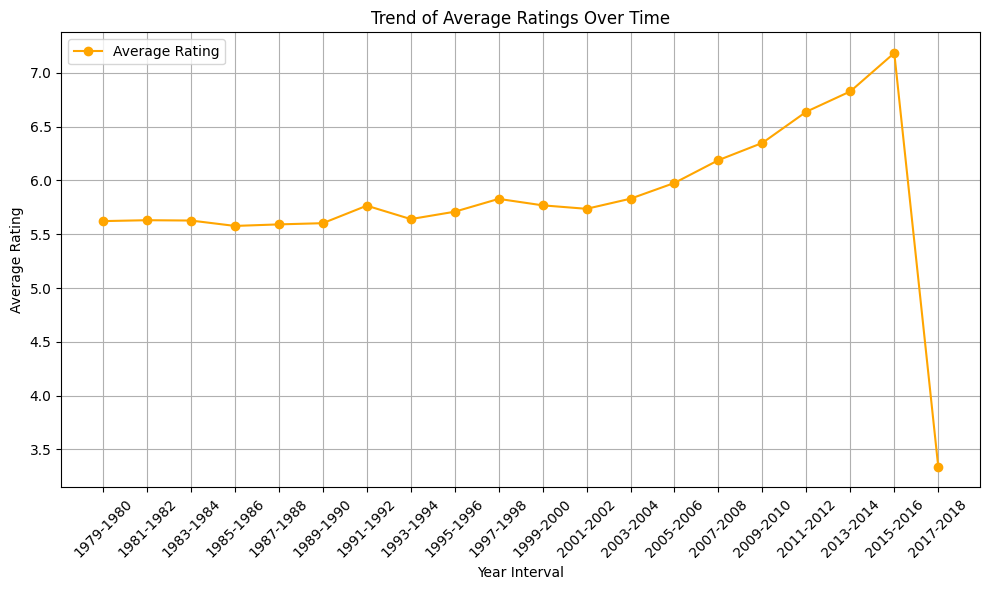

In [ ]:
# Plotting the trend line
plt.figure(figsize=(10, 6))
plt.plot(average_rating_per_interval['Year_Interval'], average_rating_per_interval['Average_Rating'],
         marker='o', linestyle='-', color='orange', label='Average Rating')

# Adding trend line
plt.xticks(rotation=45)
plt.title('Trend of Average Ratings Over Time')
plt.xlabel('Year Interval')
plt.ylabel('Average Rating')
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Grouping by 'Year_Interval' and sum the 'Rater_Number' to get the total number of ratings per interval
ratings_per_interval = info.groupby('Year_Interval')['Rater_Number'].sum().reset_index()

# Print the result
print(ratings_per_interval)

   Year_Interval  Rater_Number
0      1979-1980         30217
1      1981-1982         90934
2      1983-1984         80009
3      1985-1986         79167
4      1987-1988         97458
5      1989-1990         94065
6      1991-1992        151414
7      1993-1994        198899
8      1995-1996        337421
9      1997-1998        417579
10     1999-2000        656318
11     2001-2002        580683
12     2003-2004       1021254
13     2005-2006       1067032
14     2007-2008       1444590
15     2009-2010       1435144
16     2011-2012       1692611
17     2013-2014       1027658
18     2015-2016         86206
19     2017-2018            14


<ipython-input-129-961dc5a49e25>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ratings_per_interval = info.groupby('Year_Interval')['Rater_Number'].sum().reset_index()


### 2.2 Data Exploration


### 2.2.1 Univariate analysis

In [ ]:
#Analysing categorical data
print('Age_Category mode: ', info['Age_Category'].mode())
print('Game_Type mode: ', info['Game_Type'].mode())


Age_Category mode:  0    5 to under 12
Name: Age_Category, dtype: object
Game_Type mode:  0    BaseGame
Name: Game_Type, dtype: object


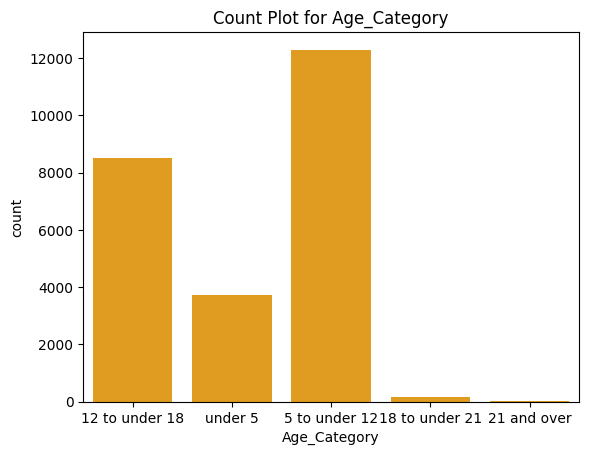

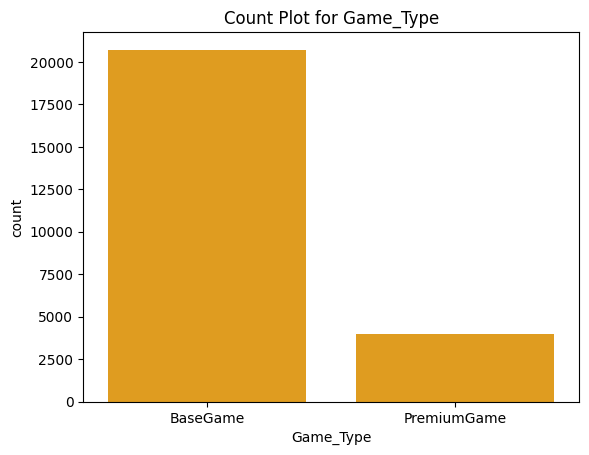

In [ ]:
cat_variables = ['Age_Category', 'Game_Type']
for i in cat_variables:
   plt.figure()
   sns.countplot(x=info[i], color = 'orange')
   plt.title(f'Count Plot for {i}')

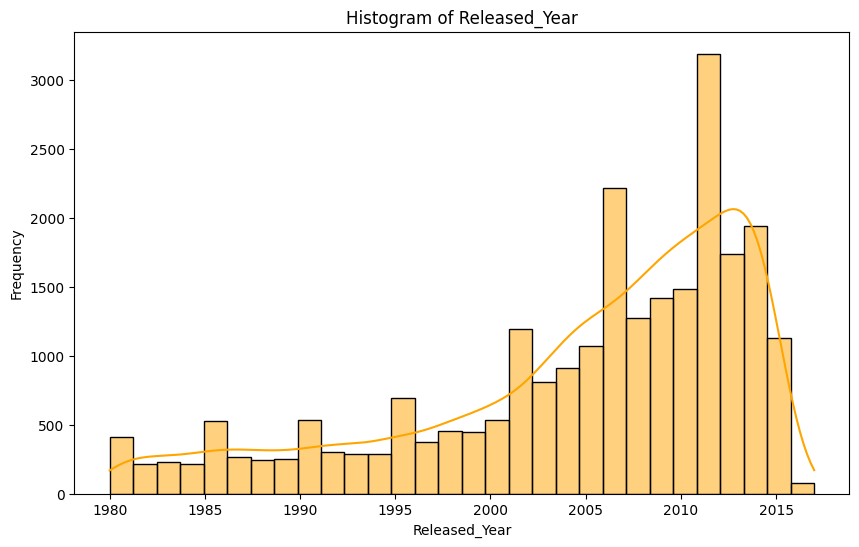

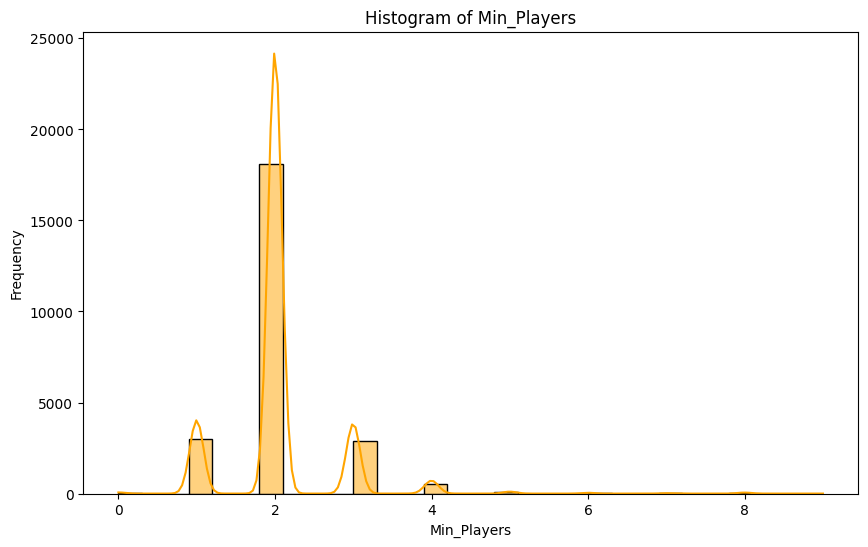

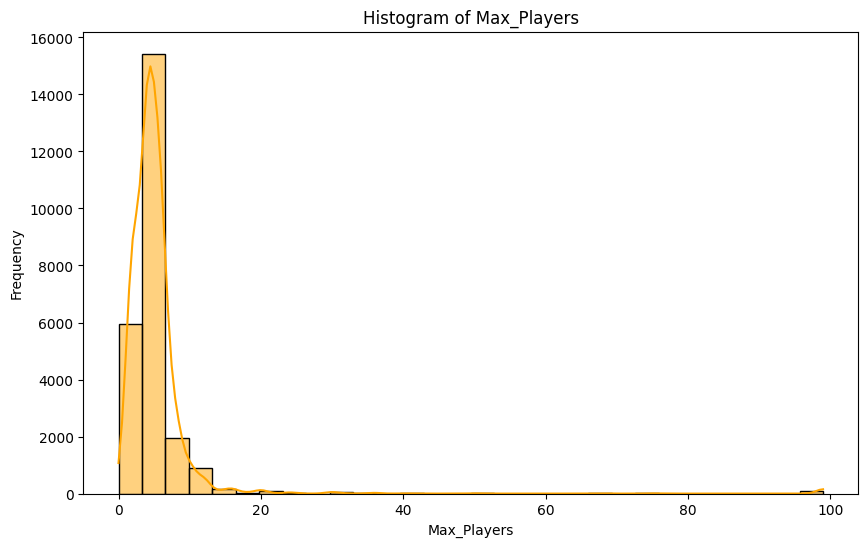

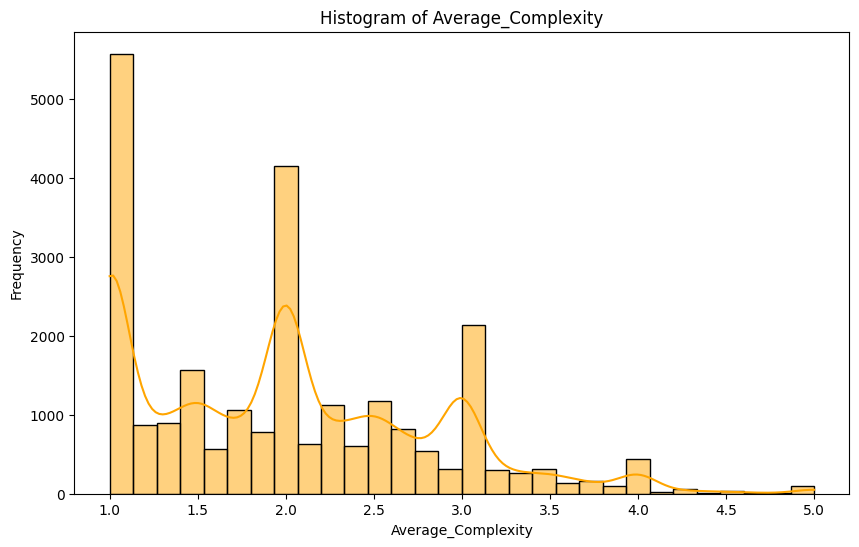

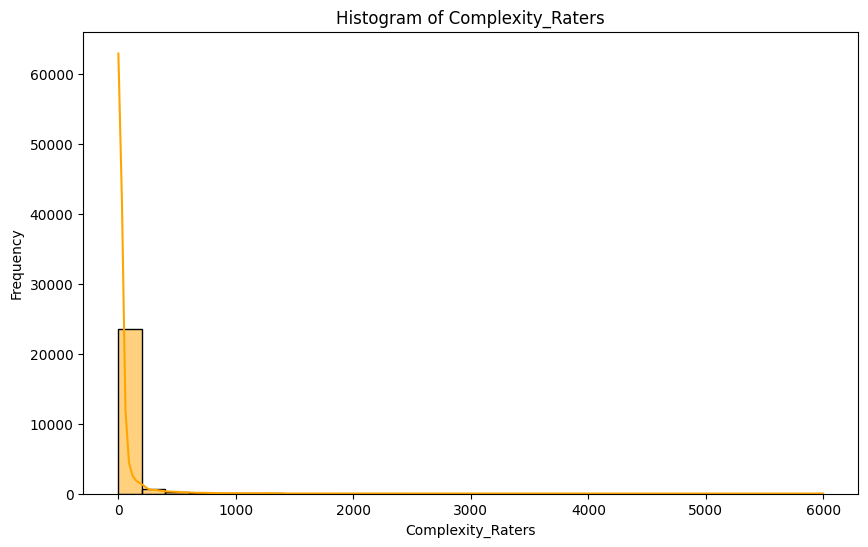

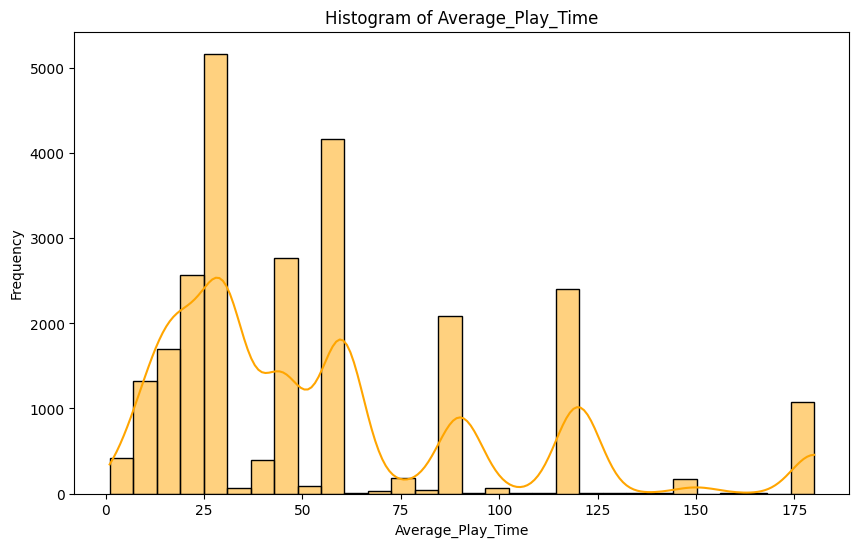

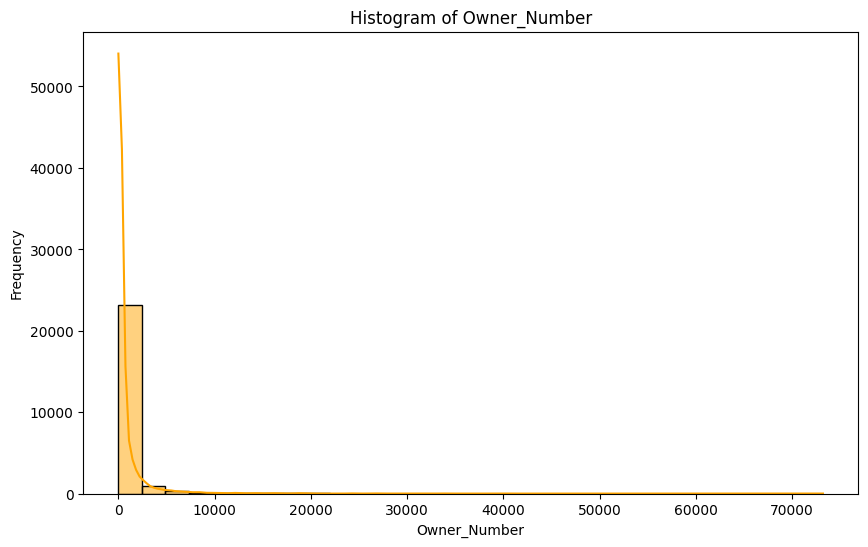

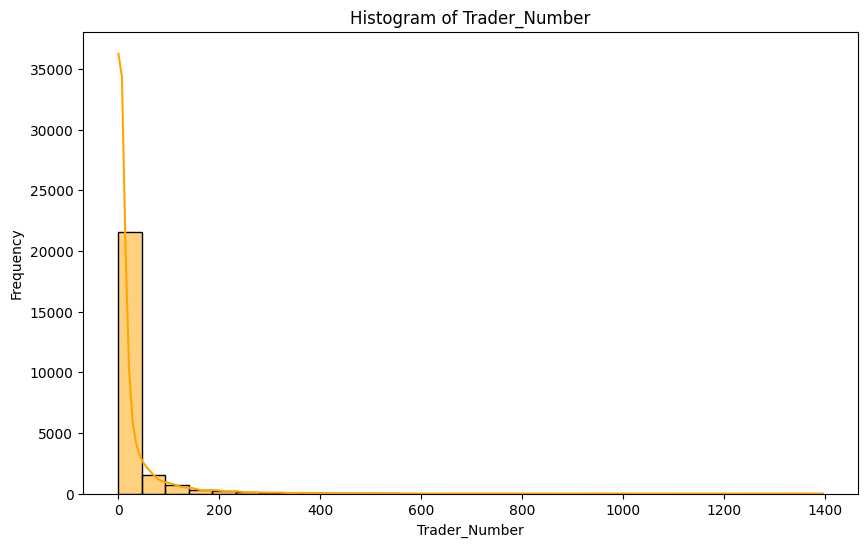

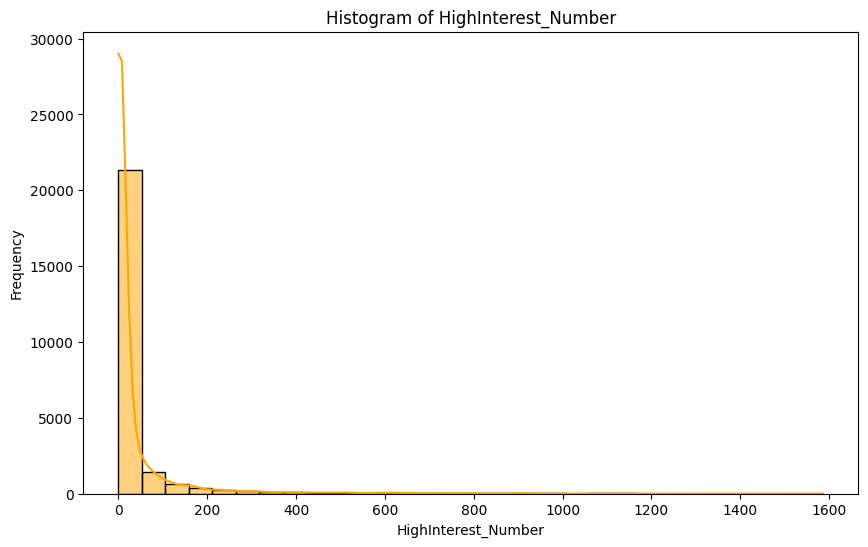

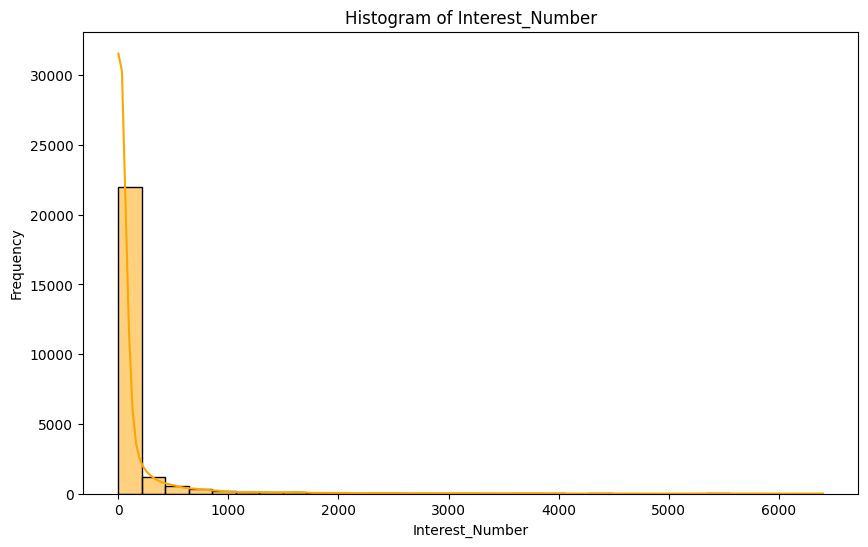

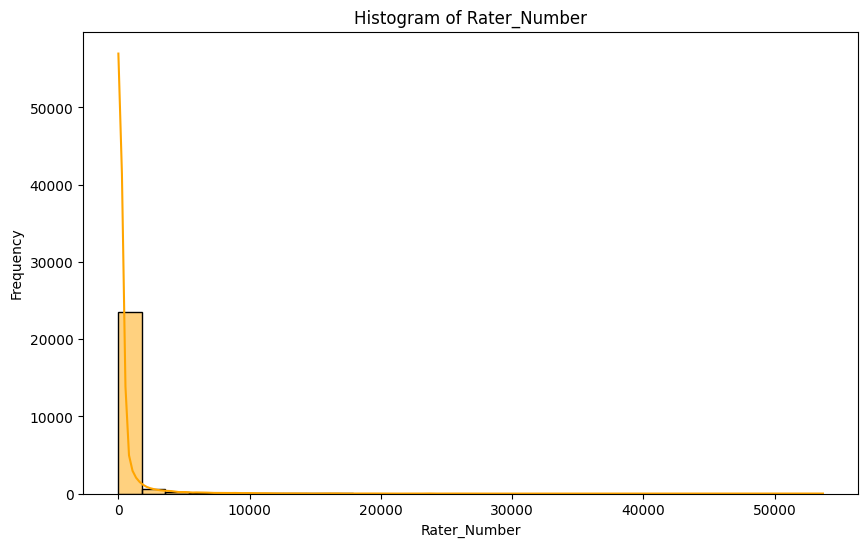

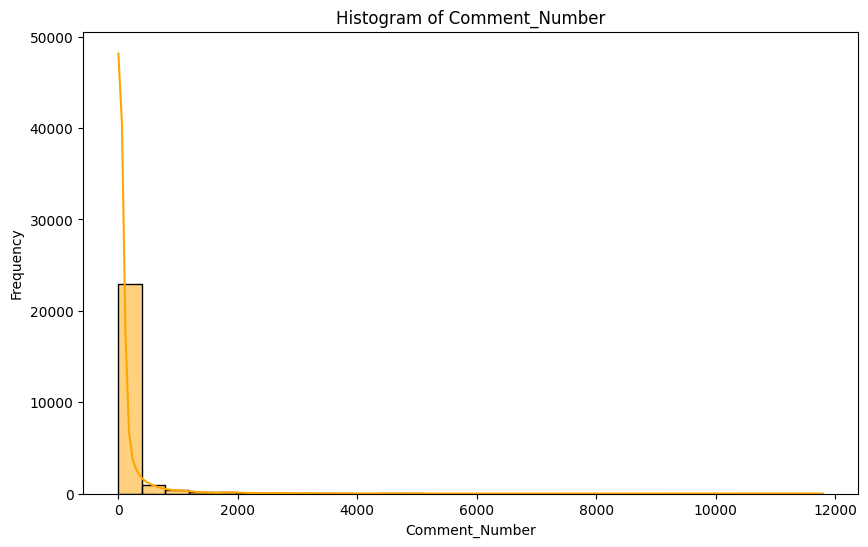

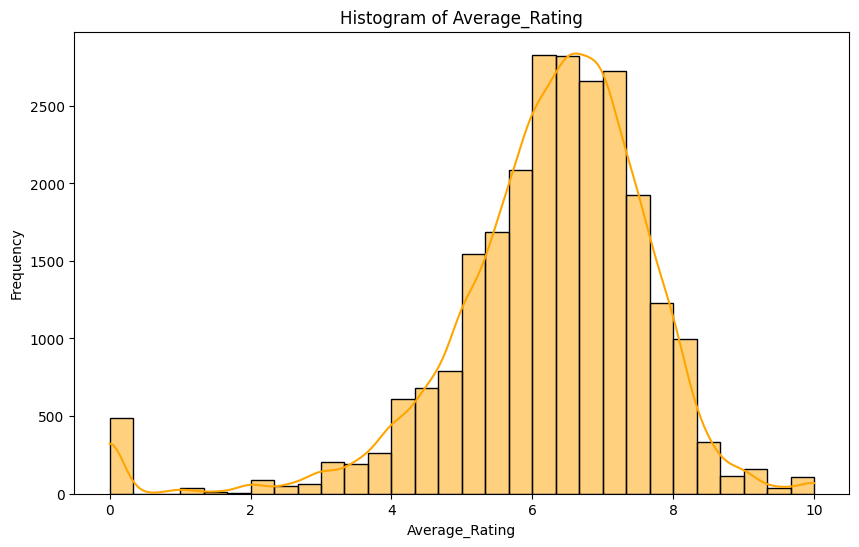

In [ ]:
# List of numerical variables
numerical_variables = ['Released_Year', 'Min_Players', 'Max_Players', 'Average_Complexity',
                       'Complexity_Raters', 'Average_Play_Time', 'Owner_Number', 'Trader_Number',
                       'HighInterest_Number', 'Interest_Number', 'Rater_Number', 'Comment_Number',
                       'Average_Rating']

# Plotting histograms for each variable
for var in numerical_variables:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=info, x=var, kde=True, bins=30, color='orange')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

### 2.2.2 Bivariate analysis


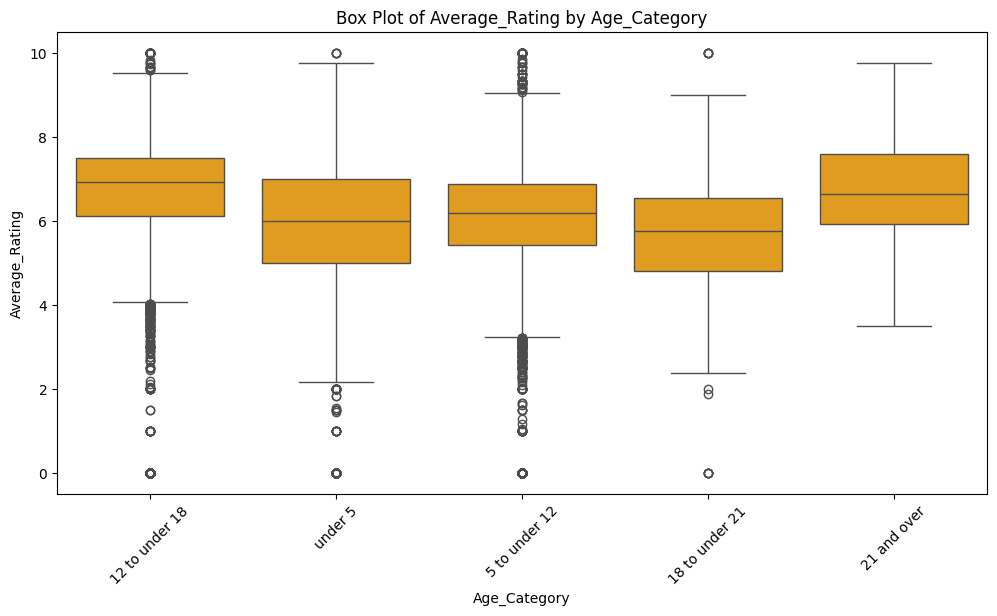

In [ ]:
# Plotting Box Plot for Age_Category vs Average_Rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Category', y='Average_Rating', data=info, color='orange')
plt.title('Box Plot of Average_Rating by Age_Category')
plt.xlabel('Age_Category')
plt.ylabel('Average_Rating')
plt.xticks(rotation=45)
plt.show()

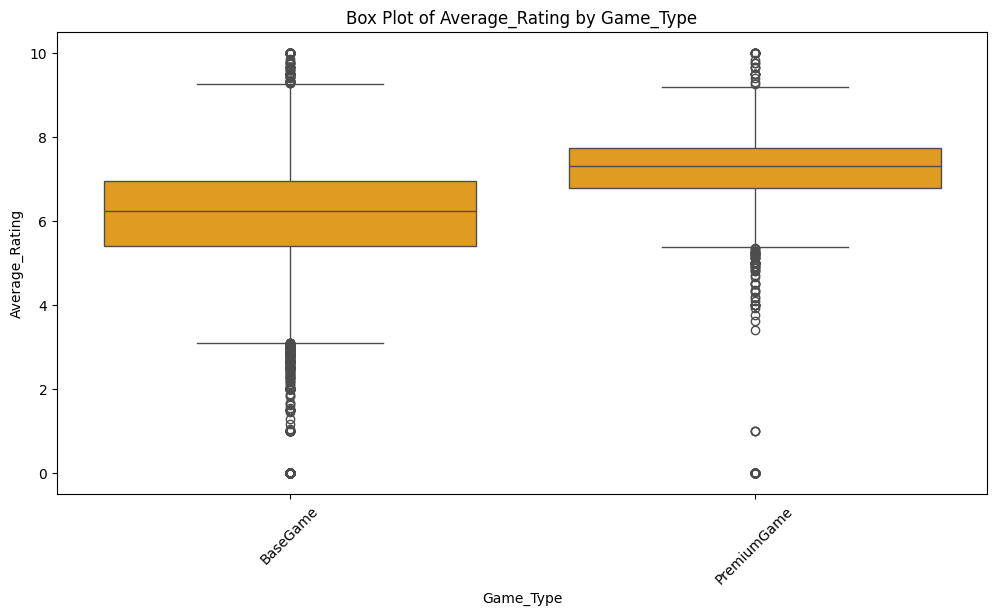

In [ ]:
# Plotting Box Plot for Game_Type vs Average_Rating
plt.figure(figsize=(12, 6))
sns.boxplot(x='Game_Type', y='Average_Rating', data=info, color='orange')
plt.title('Box Plot of Average_Rating by Game_Type')
plt.xlabel('Game_Type')
plt.ylabel('Average_Rating')
plt.xticks(rotation=45)
plt.show()

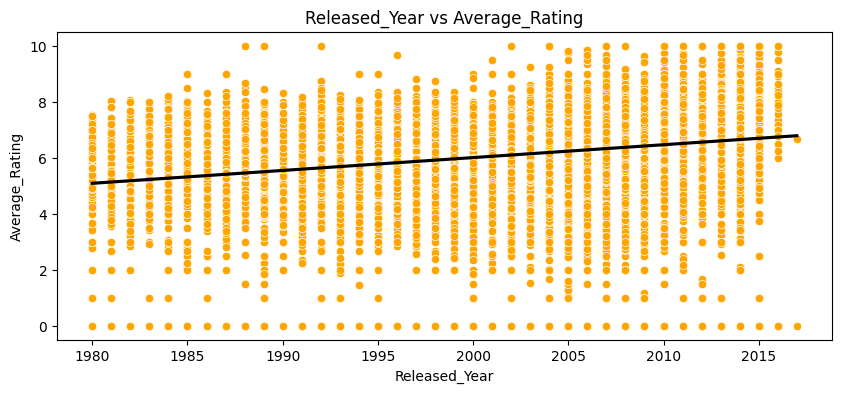

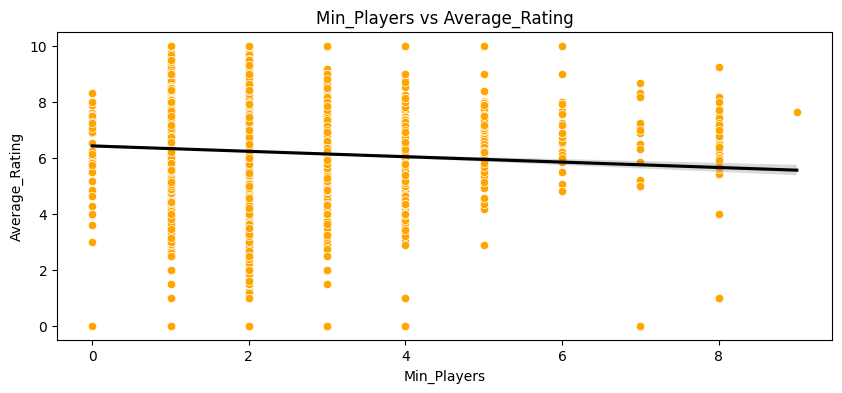

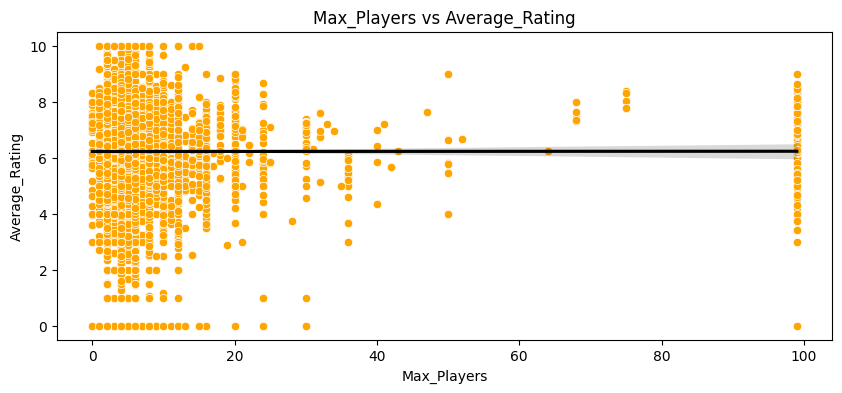

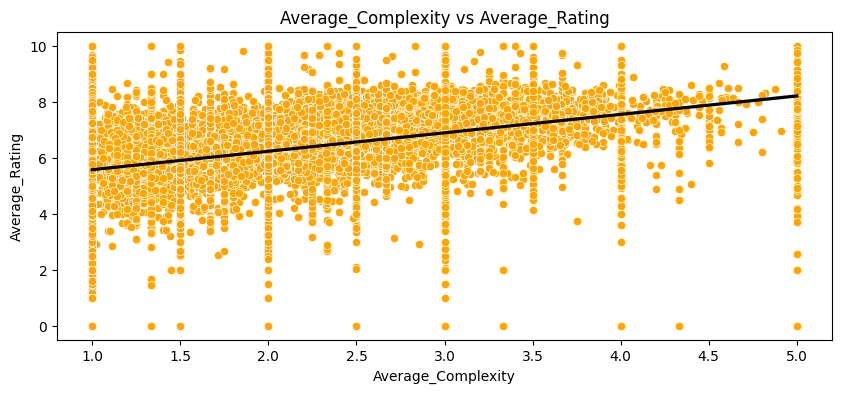

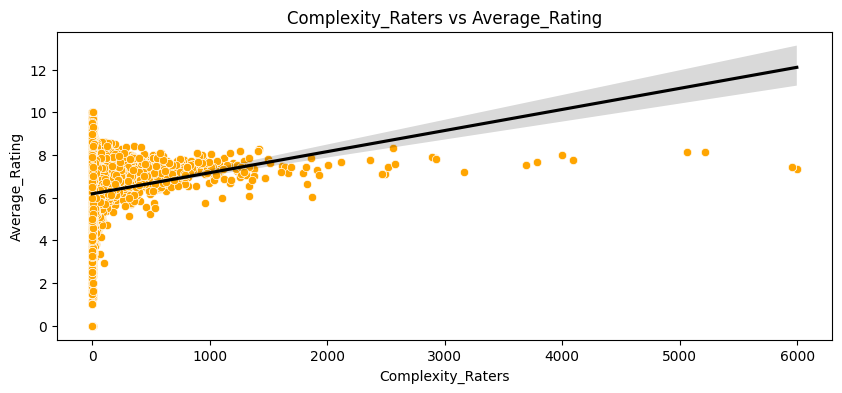

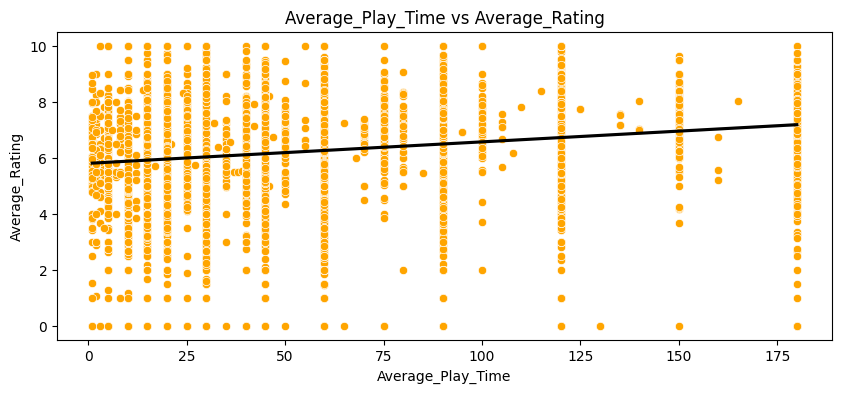

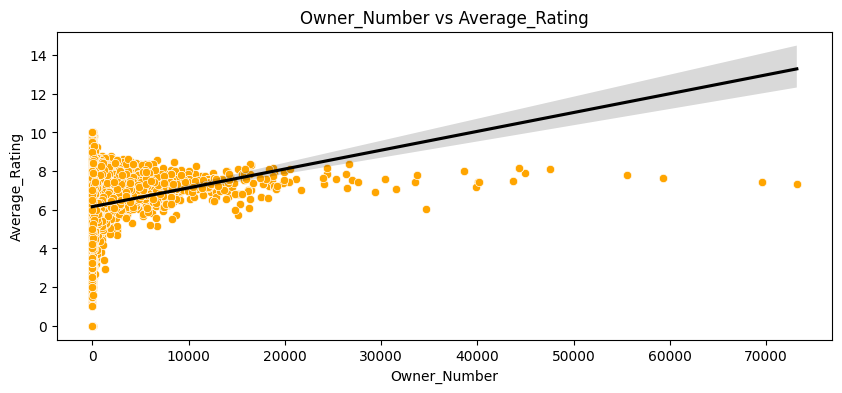

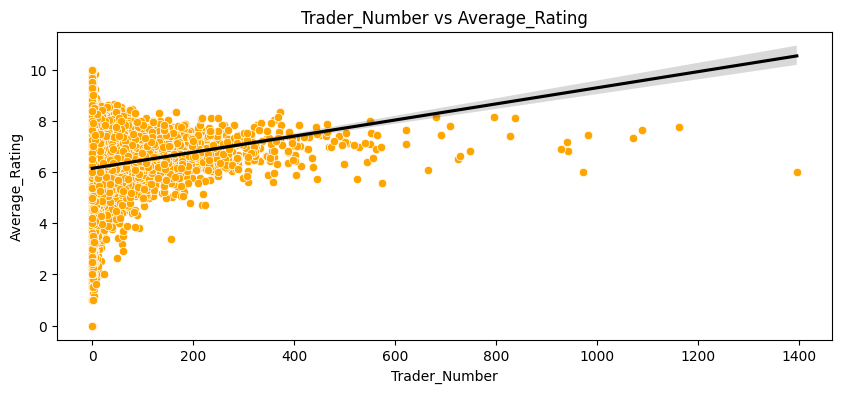

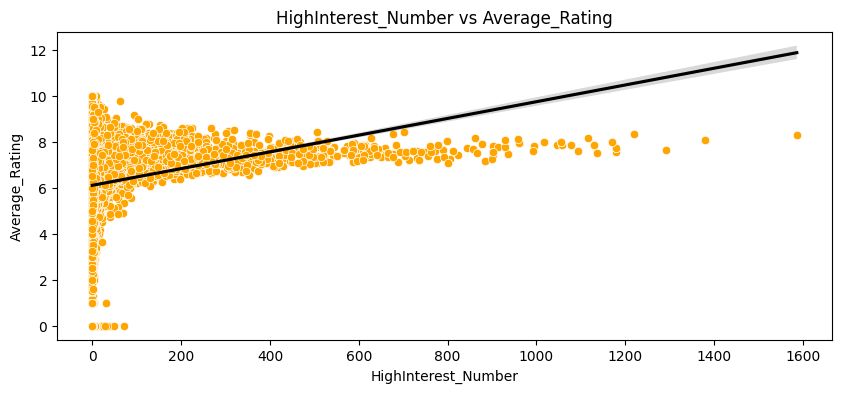

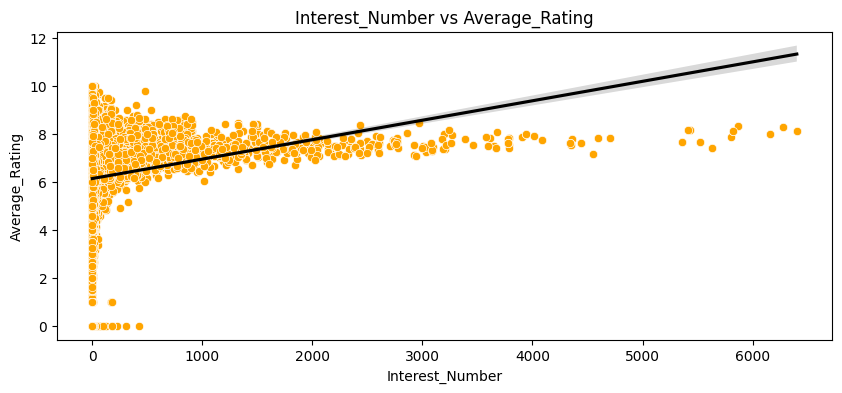

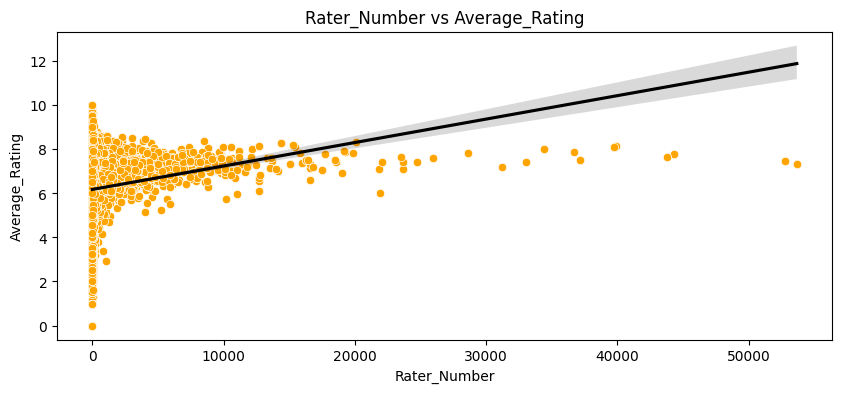

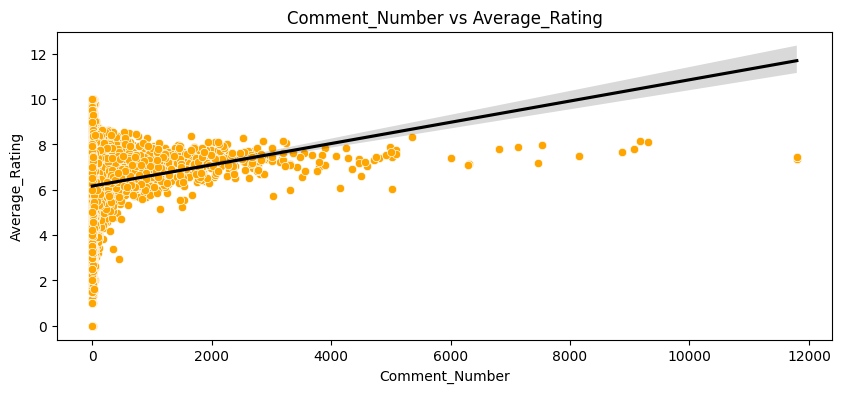

In [ ]:
# List of numerical variables
numerical_variables = [
    'Released_Year', 'Min_Players', 'Max_Players', 'Average_Complexity',
    'Complexity_Raters', 'Average_Play_Time', 'Owner_Number', 'Trader_Number',
    'HighInterest_Number', 'Interest_Number', 'Rater_Number', 'Comment_Number'
]

# Loop through numerical variables and create scatter plots with regression lines
for var in numerical_variables:
    plt.figure(figsize=(10, 4))
    sns.scatterplot(x=var, y='Average_Rating', data=info, color='orange')
    sns.regplot(x=var, y='Average_Rating', data=info, scatter=False, color='black')
    plt.title(f'{var} vs Average_Rating')
    plt.xlabel(var)
    plt.ylabel('Average_Rating')
    plt.show()

### 2.2.3 Multivariate Analysis

In [ ]:
# Converting categorical variables into numerical before multivariate analysis
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
info['Age_Category_T'] = encoder.fit_transform(info['Age_Category'])
info['Game_Type_T'] = encoder.fit_transform(info['Game_Type'])
info.sample(10)

,Game_ID,Game_Name,Released_Year,Game_Type,Age_Category,Min_Players,Max_Players,Average_Complexity,Complexity_Raters,Average_Play_Time,Owner_Number,Trader_Number,HighInterest_Number,Interest_Number,Rater_Number,Comment_Number,Average_Rating,Year_Interval,Age_Category_T,Game_Type_T
18860,8942,Sekigahara: The Unification of Japan,2011,BaseGame,12 to under 18,2,2,2.70,191,180,2745,33,440,1336,1587,553,8.04,2011-2012,0,0
13082,17860,eBay: The Card Game,2001,BaseGame,5 to under 12,3,6,2.00,5,45,107,7,1,3,56,22,5.10,2001-2002,3,0
19952,55420,Quartex,2012,BaseGame,5 to under 12,2,5,1.00,1,30,65,0,1,11,29,14,6.38,2011-2012,3,0
19100,12049,The World of Smog: On Her Majesty's Service,2015,BaseGame,12 to under 18,2,4,2.54,13,60,391,10,43,177,100,62,7.37,2015-2016,0,0
2902,17777,Power Barons,1986,BaseGame,5 to under 12,3,4,2.04,24,30,466,78,0,7,157,96,5.37,1985-1986,3,0
10503,48456,ScatterLand,2011,BaseGame,5 to under 12,2,4,2.00,1,30,8,0,0,2,1,3,7.50,2011-2012,3,0
17016,41032,Yotta Know Waterfowl,1982,BaseGame,under 5,2,4,2.00,1,10,2,0,0,0,3,0,5.33,1981-1982,4,0
21888,25019,Semper Fi: The Marine Corps Game,1987,BaseGame,12 to under 18,2,5,1.00,1,1,5,3,0,1,2,1,6.50,1987-1988,0,0
22937,20682,Stop it!,2003,BaseGame,5 to under 12,2,6,1.25,4,10,73,6,0,5,26,17,4.27,2003-2004,3,0
16209,17302,Galapagos,2013,BaseGame,5 to under 12,2,4,1.57,7,30,79,3,4,31,65,22,5.40,2013-2014,3,0


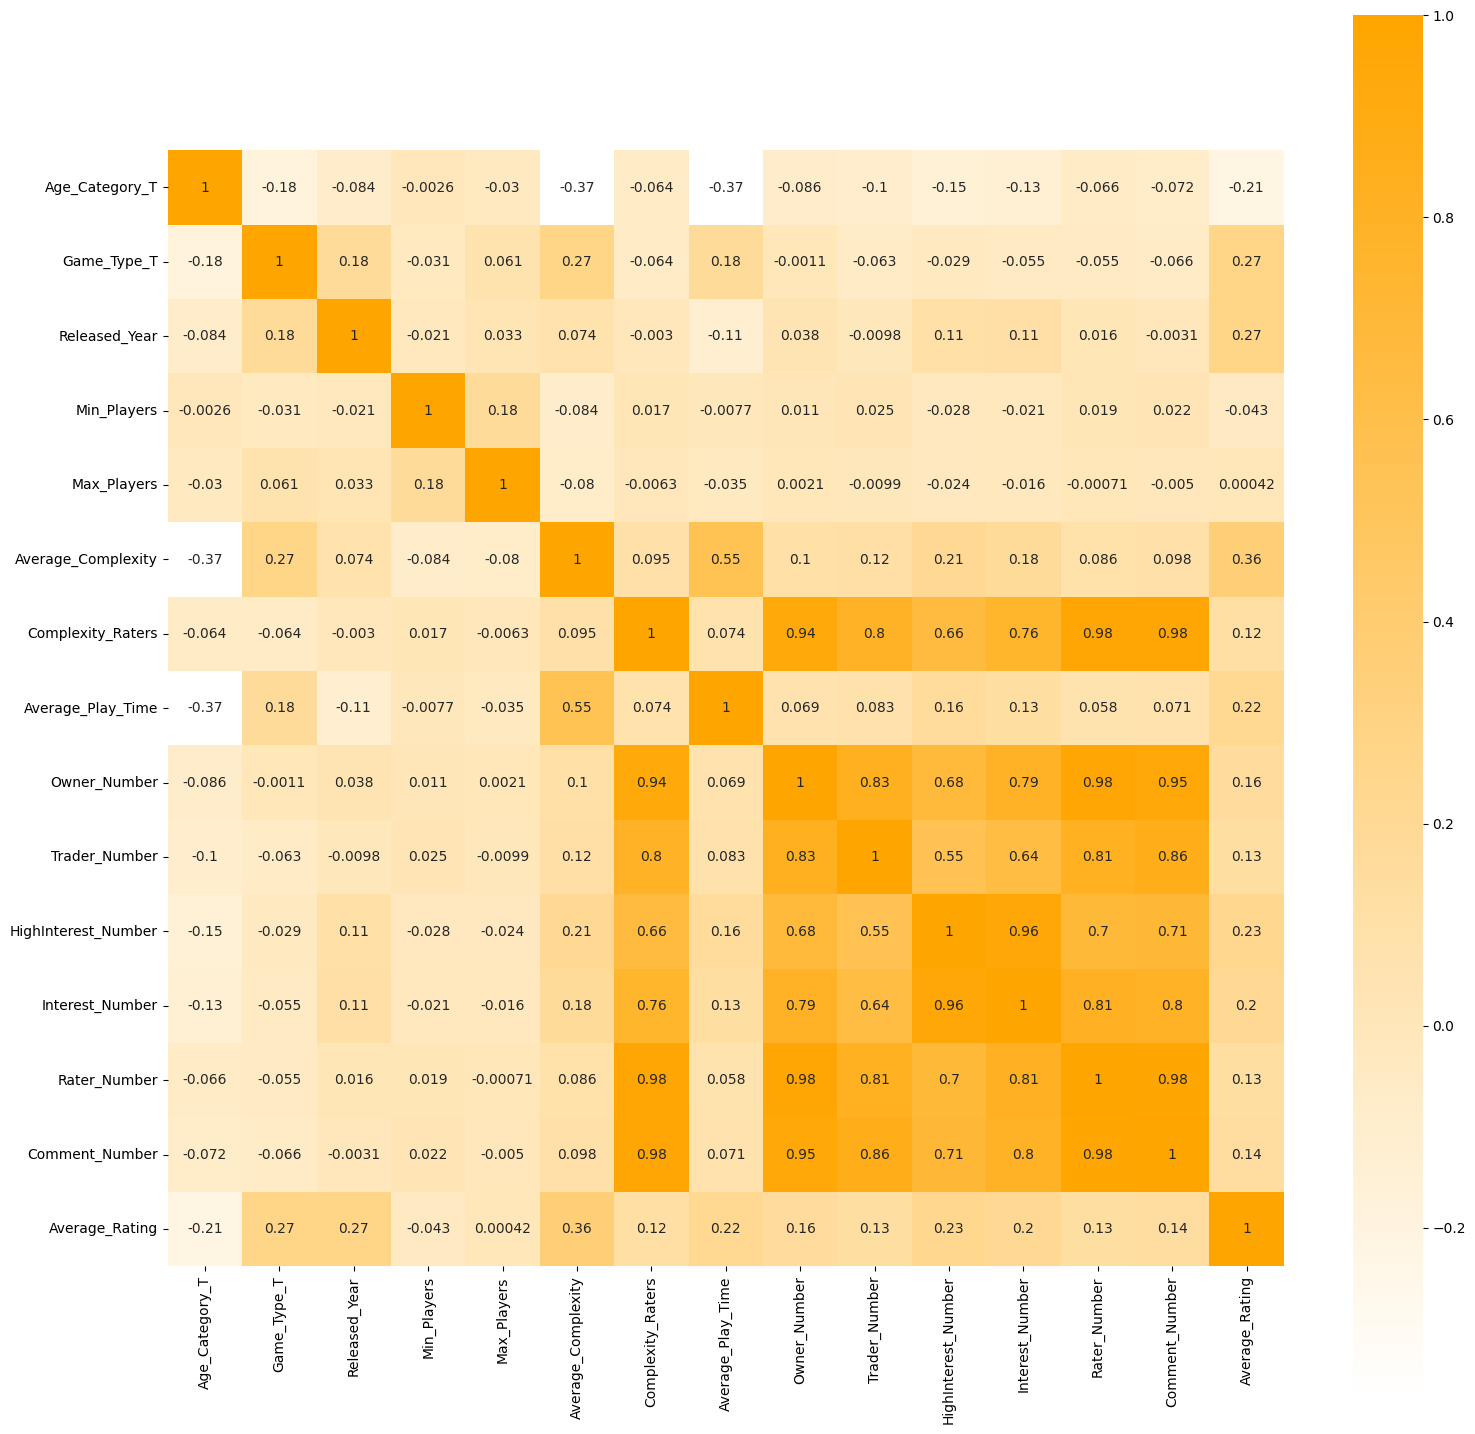

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors

# Create a custom orange colormap
cmap = mcolors.LinearSegmentedColormap.from_list('orange_gradient', ['white', 'orange'])

# Plotting the heatmap
plt.figure(figsize=(18, 18))  # Adjust the figure size as needed
var = ['Age_Category_T', 'Game_Type_T', 'Released_Year', 'Min_Players', 'Max_Players',
       'Average_Complexity', 'Complexity_Raters', 'Average_Play_Time', 'Owner_Number',
       'Trader_Number', 'HighInterest_Number', 'Interest_Number', 'Rater_Number',
       'Comment_Number', 'Average_Rating']

sns.heatmap(info[var].corr(), square=True, cmap=cmap, annot=True)

# Optionally rotate the x and y axis labels for better readability
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()


## Feature Selection

From above heatmap, we select features which show positive correlation >=0.2 with the target variable. However, we will select only  interest number among interest number and high interest number as their correlation is 0.96.

In [ ]:
#feature selection
features=['Game_Type_T', 'Average_Complexity', 'Average_Play_Time', 'Interest_Number']
X=info[features]
X.head()

,Game_Type_T,Average_Complexity,Average_Play_Time,Interest_Number
0,0,3.36,120,796
1,0,2.00,60,4
2,0,2.00,10,49
3,0,2.40,75,184
4,0,3.00,120,3


In [ ]:
#defining target
y=info['Average_Rating']
y.head()

,Average_Rating
0,7.52
1,7.50
2,6.49
3,7.66
4,7.50


<a id = "cell_modeling"></a>
## 3. Machine learning model development


#### 3.1 Splitting Data

Since we have a large dataset, we will divide 80% of the data to train our linear regression model and use resst 20% to test the result after training.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

quad = PolynomialFeatures(degree = 2)
X_quad = quad.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_quad, y, test_size=0.2, random_state = 0)

print('Training dataset size:',X_train.shape)
print('Test dataset size:',X_test.shape)


Training dataset size: (19779, 15)
Test dataset size: (4945, 15)


#### 3.2 Scaling dataset

We will now scale both the training and testing dataset to ensure consistency across features, improve the convergence of optimization algorithms, give equal importance to all features.

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

#### 3.3 Initiating model

Since we are dealing with labeled dataset, we will use superivised machine learning model for training the dataset. Since training the model is based on data to predict a continuous target variable based on input features, we will be using polynomial regression to make the necessary predictions since we have non linear relation between multiple predictors and the target variables.

In [ ]:
#import linear_model
from sklearn import linear_model

#create a linear_model object
model = linear_model.LinearRegression()

#### 3.4. Training dataset

In [ ]:
# Training using train dataset
model.fit(X_train_scaled, y_train)
trainedmodel= model.fit(X_train_scaled, y_train)



#### 3.5 Testing dataset

In [ ]:
#Make predictions for the test dataset
y_pred = model.predict(X_test_scaled)


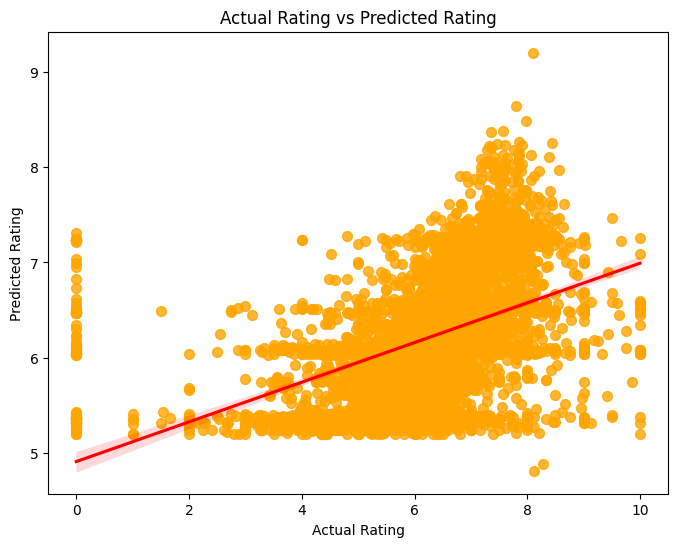

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Defining plot size
plt.figure(figsize=(8, 6))

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Actual Rating': y_test, 'Predicted Rating': y_pred})

# Scatter plot with regression line
sns.regplot(
    x='Actual Rating',
    y='Predicted Rating',
    data=plot_data,
    scatter_kws={'s':50, 'color':'orange'},  # Set scatter points to orange
    line_kws={'color':'red'}  # Set regression line to orange
)

# Labels and title
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual Rating vs Predicted Rating")

# Show plot
plt.show()


#### 3.6 Inspection

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define the original features
features = ['Game_Type_T', 'Average_Complexity', 'Average_Play_Time', 'Interest_Number']

# Assume X and y are your data and target variables
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=0)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Get the feature names
feature_names = poly.get_feature_names_out(input_features=features)

# Create a DataFrame to match coefficients with feature names
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Add the intercept as a separate row using pd.concat
intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept]})
coef_df = pd.concat([coef_df, intercept_df], ignore_index=True)

# Display the coefficients
print(coef_df)

# Construct the polynomial equation
def construct_equation(coefficients, feature_names):
    equation = "y = "
    terms = []

    for coef, name in zip(coefficients, feature_names):
        if coef != 0:
            term = f"{coef:.4f} * {name}"
            terms.append(term)

    equation += " + ".join(terms)
    return equation

# Get the polynomial equation
equation = construct_equation(np.append(coefficients, intercept), np.append(feature_names, 'Intercept'))
print("Polynomial Equation:", equation)


                                 Feature  Coefficient
0                                      1            0
1                            Game_Type_T            1
2                     Average_Complexity            1
3                      Average_Play_Time           -0
4                        Interest_Number            0
5                          Game_Type_T^2            1
6         Game_Type_T Average_Complexity           -0
7          Game_Type_T Average_Play_Time           -0
8            Game_Type_T Interest_Number            0
9                   Average_Complexity^2           -0
10  Average_Complexity Average_Play_Time            0
11    Average_Complexity Interest_Number           -0
12                   Average_Play_Time^2            0
13     Average_Play_Time Interest_Number           -0
14                     Interest_Number^2           -0
15                             Intercept            4
Polynomial Equation: y = 0.6480 * Game_Type_T + 1.2706 * Average_Complexity + -0.0

Interpretation:

Linear Terms:

Game_Type_T (0.6480): Positive impact on the target variable
𝑦
y. As the game type increases, the rating tends to increase.
Average_Complexity (1.2706): Strong positive impact. Higher complexity generally results in higher ratings.
Average_Play_Time (-0.0057): Slight negative impact. Longer play times have a minimal negative effect on ratings.
Interest_Number (0.0016): Small positive impact. More interest has a minor positive effect on ratings.
Quadratic Terms:

Game_Type_T^2 (0.6480): Positive coefficient indicates that as the game type increases, its effect on the rating becomes more significant, suggesting a non-linear improvement in ratings.
Average_Complexity^2 (-0.1818): Negative coefficient implies diminishing returns with increasing complexity. Very high complexity might start to decrease ratings.
Interaction Terms:

Game_Type_T * Average_Complexity (-0.1474): Negative interaction. The combined effect of game type and complexity is less than the sum of their individual effects, indicating that high complexity might not always align well with certain game types.
Game_Type_T * Average_Play_Time (-0.0015): Very slight negative interaction effect.
Game_Type_T * Interest_Number (0.0003): Minor positive interaction effect. The combined influence of game type and interest slightly increases ratings.
Average_Complexity * Average_Play_Time (0.0012): Small positive effect. Higher complexity with longer play time has a minor positive impact on ratings.
Average_Complexity * Interest_Number (-0.0001): Very slight negative interaction.
Higher-Order Terms:

Average_Play_Time^2, Average_Play_Time * Interest_Number, Interest_Number^2: Coefficients are zero, indicating these terms have no significant impact or are not necessary for the model.
Intercept (4.3482): This is the baseline rating when all feature values are zero.

<a id = "cell_Evaluation"></a>
## 4. Model evaluation                                                                                                                       

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

R-squared: 0.21


In [ ]:
from sklearn.metrics import mean_absolute_error

# Mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.0f}")

Mean Absolute Error: 1


In [ ]:
from sklearn.metrics import mean_squared_error

# Root mean square error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Square Error: {rmse:.0f}")

Root Mean Square Error: 1


With an R-squared of 0.19, MAE of 1, and RMSE of 1, the model exhibits limited predictive accuracy, with errors representing about 10% of the rating scale. We might need further optimization for the model to predict efficiently or select other suitable models.